# Testing IL
In this notebook we will compare the IL of the implemented AMM to theory.


## Simulation Setup

In [5]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../..')
# import copy
# import random
# import math

# Experiments
from model import run
#from model.plot_utils import *
from model import init_utils
from model.amm.omnipool_amm import OmnipoolState


########## AGENT CONFIGURATION ##########
# key -> token name, value -> token amount owned by agent
# note that token name of 'omniABC' is used for omnipool LP shares of token 'ABC'
LP1 = {'omniR1': 500000}
LP2 = {'omniR2': 1500000}
trader = {'LRNA': 1000000, 'R1': 1000000, 'R2': 1000000}

# key -> agent_id, value -> agent dict
agent_d = {'Trader': trader, 'LP1': LP1, 'LP2': LP2}
#agent_d = {'Trader': trader, 'LP1': LP1}


########## ACTION CONFIGURATION ##########

action_dict = {
    'sell_r2_for_r1': {'token_buy': 'R1', 'token_sell': 'R2', 'amount_sell': 3000, 'action_id': 'Trade', 'agent_id': 'Trader'},
    'sell_r1_for_r2': {'token_sell': 'R1', 'token_buy': 'R2', 'amount_sell': 1000, 'action_id': 'Trade', 'agent_id': 'Trader'}
}

# list of (action, number of repititions of action), timesteps = sum of repititions of all actions
trade_count = 5000
action_ls = [('trade', trade_count)]

# maps action_id to action dict, with some probability to enable randomness
prob_dict = {
    'trade': {'sell_r2_for_r1': 0.5,
              'sell_r1_for_r2': 0.5}
}


########## CFMM INITIALIZATION ##########

initial_state = OmnipoolState(
    tokens={
        'HDX': {'liquidity': 1000000, 'LRNA_price': 1},
        'USD': {'liquidity': 1000000, 'LRNA_price': 1},
        'R1': {'liquidity': 500000, 'LRNA_price': 2},
        'R2': {'liquidity': 1500000, 'LRNA_price': 2/3},
    },
    lrna_fee=0,
    asset_fee=0
)

config_params = {
    # 'amm': amm,
    'cfmm_type': "",
    'initial_state': initial_state,
    'agent_d': agent_d,
    'action_ls': action_ls,
    'prob_dict': prob_dict,
    'action_dict': action_dict,
}

config_dict, state = init_utils.get_configuration(config_params)

pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.float_format = '{:.2f}'.format

run.config(config_dict, state)
events = run.run()



                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (5000, 3, 1, 3)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Total execution time: 31.15s


In [6]:
from model import processing
rdf, agent_df = processing.postprocessing(events, optional_params=['pool_val', 'deposit_val', 'withdraw_val'])


In [7]:
%matplotlib inline



In [8]:
rdf[['R-R1', 'Q-R1', 'P-R1']].head(20)  # Todo: delete

,R-R1,Q-R1,P-R1
3,1001000.0,1998001.998002,1.99600599200999
6,999998.003999984,2000003.992008,2.00000798402397
9,999000.007968064,2002001.98603395,2.00400597604195
12,998005.988000143,2003995.99205582,2.0079999680879
15,999005.988000143,2001990.00208567,2.00398198422548
18,1000005.98800014,1999988.02407143,1.99997604821456
21,1001005.98800014,1997990.04598933,1.99598211193622
24,1000003.96807203,1999992.06388743,1.99998412780635
27,999005.948255155,2001990.08173391,2.00398214368047
30,998011.904644277,2003984.11150503,2.00797615958229


In [9]:
agent_df.tail(20)  # TODO: delete

,simulation,subset,run,substep,timestep,agent_id,deposit_val,withdraw_val,s-HDX,s-USD,...,s-R2,r-HDX,r-USD,r-R1,r-R2,p-HDX,p-USD,p-R1,p-R2,q
44947,0,0,1,3,4994,LP1,1003651.26260688,1003649.5961462,0,0,...,0,0,0,0,0,0,0,2.0,0,0
44948,0,0,1,3,4994,LP2,996355.391110736,996353.730718139,0,0,...,1500000.0,0,0,0,0,0,0,0,0.666666666666667,0
44955,0,0,1,3,4995,Trader,3674206.07557033,3674237.87005058,0,0,...,0,0,0,1002811.40344552,991518.097563961,0,0,0,0,1000000
44956,0,0,1,3,4995,LP1,1005646.60805768,1005642.62255856,0,0,...,0,0,0,0,0,0,0,2.0,0,0
44957,0,0,1,3,4995,LP2,994369.289182446,994365.326093097,0,0,...,1500000.0,0,0,0,0,0,0,0,0.666666666666667,0
44964,0,0,1,3,4996,Trader,3671514.62315789,3671527.79556552,0,0,...,0,0,0,1001811.40344552,994546.030986904,0,0,0,0,1000000
44965,0,0,1,3,4996,LP1,1003632.6742665,1003631.02473028,0,0,...,0,0,0,0,0,0,0,2.0,0,0
44966,0,0,1,3,4996,LP2,996373.911937316,996372.268377051,0,0,...,1500000.0,0,0,0,0,0,0,0,0.666666666666667,0
44973,0,0,1,3,4997,Trader,3674181.24645008,3674212.83244438,0,0,...,0,0,0,1002802.19654917,991546.030986904,0,0,0,0,1000000
44974,0,0,1,3,4997,LP1,1005628.03833898,1005624.07901043,0,0,...,0,0,0,0,0,0,0,2.0,0,0


## Analysis

[0]


AttributeError: 'DataFrame' object has no attribute 'plt'

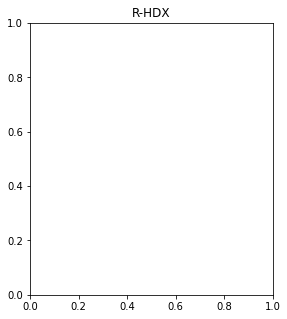

In [10]:
from model import plot_utils as pu
var_list = ['R', 'Q']
pu.plot_vars(rdf, var_list)


In [ ]:
var_list = ['r-R1', 'r-R2']
trader_df = agent_df[agent_df['agent_id'] == 'Trader']
pu.plot_vars(trader_df, var_list)


In [ ]:
# merge agent_df, rdf to one df on timesteps, run, etc

merged_df = pd.merge(agent_df, rdf, how="inner", on=["timestep", "simulation", "run", "subset", "substep"])

In [ ]:
# add IL column to agent DF, where val_hold is calculated using initial holdings from agent_d
merged_df['IL'] = merged_df.apply(lambda x: x['withdraw_val']/x['deposit_val'] - 1, axis=1)

merged_df[['timestep', 'agent_id', 'q','Q-R1', 's-R1','S-R1','r-R1','R-R1','pool_val', 'deposit_val','IL','withdraw_val', 'p-R1']].tail()

## IL over time



In [ ]:
var_list = ['pool_val', 'deposit_val', 'withdraw_val', 'IL']
LP1_merged_df = merged_df[merged_df['agent_id'] == 'LP1']
pu.plot_vars(LP1_merged_df, var_list)

## IL as a function of price movement

### Theory

On a price move from $p_i^Q \to k p_i^Q$, LP is entitled to $k\frac{\sqrt{k}}{k+1}$ of the *original value* of the matched pool.
$$
Val_{hold} = k p_i^Q R_i\\
Val_{pool} = \frac{\sqrt{k}k}{k+1} 2Q_i = \left(\frac{2\sqrt{k}k}{k+1}\right) p_i^Q R_i
$$

### $Val_{hold}$

In [ ]:
def val_hold_func(P, R):
    return P * R

plt.figure(figsize=(15,5))

#ax = plt.subplot(131, title='P-R1/IL')
#LP1_merged_df[['IL','P-R1']].astype(float).plot(ax=ax, y=['IL'], x='P-R1', label=[])
ax = plt.subplot(131, title='P-R1/deposit_val')
LP1_merged_df[['deposit_val','P-R1']].astype(float).plot(ax=ax, y=['deposit_val'], x='P-R1', label=[])

# ax = plt.subplot(132, title='Theoretical')
x = LP1_merged_df['P-R1'].tolist()
y = LP1_merged_df.apply(lambda x: val_hold_func(x['P-R1'], LP1['omniR1']), axis=1)
ax.plot(x,y, label='Theory')

#ax = plt.subplot(132, title='Theoretical')
#x = LP1_merged_df['P-R1'].tolist()
#y = LP1_merged_df['P-R1'].apply(lambda x: IL_func(x, 2, 0.5))
#ax.plot(x,y, label='Theory')

### $Val_{Pool}$

In [ ]:
import math
def val_pool_func(P, P_init, R):
    k = P/P_init
    return 2 * k * math.sqrt(k) / (k + 1) * P_init * R

plt.figure(figsize=(15,5))

#ax = plt.subplot(131, title='P-R1/IL')
#LP1_merged_df[['IL','P-R1']].astype(float).plot(ax=ax, y=['IL'], x='P-R1', label=[])
ax = plt.subplot(131, title='P-R1/withdraw_val')
LP1_merged_df[['withdraw_val','P-R1']].astype(float).plot(ax=ax, y=['withdraw_val'], x='P-R1', label=[])

#ax = plt.subplot(132, title='Theoretical')
x = LP1_merged_df['P-R1'].tolist()
y = LP1_merged_df.apply(lambda x: val_pool_func(x['P-R1'], initial_state.price('R1'), LP1['omniR1']), axis=1)
#y = LP1_merged_df.apply(lambda x: val_pool_func(x['P-R1'], initial_values['P'][0], x['R-R1']), axis=1)
# ax.plot(x, y, label='Theory')

### Impermanent Loss

In [ ]:
def IL_func(P, P_init, R):
    return val_pool_func(P, P_init, R)/val_hold_func(P, R) - 1

plt.figure(figsize=(15,5))

#ax = plt.subplot(131, title='P-R1/IL')
#LP1_merged_df[['IL','P-R1']].astype(float).plot(ax=ax, y=['IL'], x='P-R1', label=[])
ax = plt.subplot(121, title='P-R1/IL')
LP1_merged_df[['IL','P-R1']].astype(float).plot(ax=ax, y=['IL'], x='P-R1', label=[])

#ax = plt.subplot(132, title='Theoretical')
x = LP1_merged_df['P-R1'].tolist()
y = LP1_merged_df.apply(lambda x: IL_func(x['P-R1'], initial_state.price('R1'), LP1['omniR1']), axis=1)
#y = LP1_merged_df.apply(lambda x: val_pool_func(x['P-R1'], initial_values['P'][0], x['R-R1']), axis=1)
ax.plot(x, y, label='Theory')

#ax = plt.subplot(132, title='Theoretical')
#x = LP1_merged_df['P-R1'].tolist()
#y = LP1_merged_df['P-R1'].apply(lambda x: IL_func(x, 2, 0.5))
#ax.plot(x,y, label='Theory')

In [ ]:
LP1_merged_df[['deposit_val', 'withdraw_val', 'R-R1', 's-R1', 'S-R1', 'P-R1', 'p-R1']].tail()